<br>
<u>Notebook Eight</u> | 
<a href=https://leone.gdn/NLP target=_blank>Report</a> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Multi-Layer Perceptron</b><br><br>
Andrea Leone<br>
ML for NLP — University of Trento<br>
January 2022
<hr><br><br>

In [1]:
import project 

import numpy as np
import sklearn
import sklearn.neural_network


project.notebook()

In [2]:
records = project.sql_query(""" 
    SELECT vector, category FROM talks
    WHERE  vector IS NOT NULL
    ORDER BY slug ASC;
""")

(x, y), (z, t)                       \
    = train_set, test_set            \
    = splits                         \
    = project.split_in_sets( records )

project.describe_sets(splits)

train_set  =>  (0, 1376) (1, 1572) (2, 1052) 
test_set   =>  (0,  243) (1,  275) (2,  192) 


<br/>

### Multi-Layer Perceptron Classifier

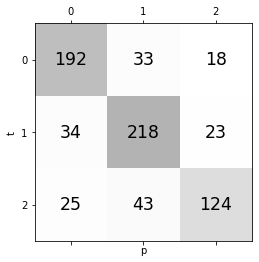

accuracy    0.752112676056338
precision   0.7526506630661439
recall      0.7428946876169098


In [3]:
mlp = sklearn.neural_network.MLPClassifier ( 
    hidden_layer_sizes=100, activation='relu',
    solver='adam', epsilon=1e-08, alpha=0.0001,
    learning_rate_init=0.001, learning_rate='adaptive',
    batch_size=300, validation_fraction=0.3,
    random_state=42
).fit(x, y)

p = mlp.predict(z)

confusion_matrix          = project.confusion_matrix (t,p)
accuracy,precision,recall = project.present_metrics  (t,p)

<b>Fine tuning trials</b> — static word embeddings 
<pre>
accuracy       precision      recall         cm_d         notes

.747619047619  .744495684007  .737277713195  180 184 107  a=tanh,    s=adam,  bs=300, hls=100, LOF out.rem.
.730263157894  .716718202432  .716631859469  115 150  68  a=tanh,    s=adam,  bs=300, hls=100, IF  out.rem.
.742253521126  .740463145882  .731880144032  186 220 121  a=tanh,    s=adam,  bs=300, hls=150
.747887323943  .751738628987  .735201786382  183 229 119  a=tanh,    s=adam,  bs=200, hls=150
.752112676056  .749234046828  .753603473001  200 192 142  a=tanh,    s=adam,  bs=300, hls=100
.745070422535  .741344655584  .743212214739  186 205 138  a=tanh,    s=adam,  bs=200, hls=100
.670422535211  .668596863119  .637938957475  185 231  60  a=tanh,    s=sgd,   bs=200, hls=100
.738028169014  .733570644813  .729361126699  193 210 121  a=tanh,    s=lbfgs, bs=200, hls=100

.736507936507  .731063409876  .727594855755  178 178 108  a=relu,    s=adam,  bs=300, hls=100, LOF out.rem.
.725877192982  .714500374177  .719048704001  109 148  74  a=relu,    s=adam,  bs=300, hls=100, IF  out.rem.
.752112676056  .752650663066  .742894687616  192 218 124  a=relu,    s=adam,  bs=300, hls=100
.746478873239  .742927527018  .746839537348  188 200 142  a=relu,    s=adam,  bs=300, hls=120
.746478873239  .741826820102  .742716984661  195 203 132  a=relu,    s=adam,  bs=300, hls=150
.747887323943  .747215922948  .739941934779  193 213 125  a=relu,    s=adam,  bs=300, hls=200
.745070422535  .743187382560  .736903448060  199 208 122  a=relu,    s=adam,  bs=200, hls=100
.650704225352  .663359136385  .611492315126  188 233  41  a=relu,    s=sgd,   bs=200, hls=100
.723943661971  .720177773146  .716077441077  189 205 120  a=relu,    s=lbfgs, bs=200, hls=100

.743661971830  .739589958962  .737832413642  196 205 127  a=sigmoid, s=adam,  bs=200, hls=100
.728169014084  .724028089397  .719189814814  189 209 119  a=sigmoid, s=lbfgs, bs=200, hls=100

</pre>

<br>